In [1]:
import pandas as pd

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samtg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [8]:
# Make Tweet URL
def make_tweet_url(tweets):
    # Get username
    username = tweets[0]
    # Get tweet ID
    tweet_id = tweets[1]
    # Make tweet URL
    tweet_url = f"https://twitter.com/{username}/status/{tweet_id}"
    return tweet_url

# Extract Image URL
from ast import literal_eval
def get_image_url(media):
    # if not NaN or {}
    if type(media) != float and media != '{}':
        # Convert to an actual Python list, not just a string
        media =  literal_eval(media)
        media = media[0]
         # Extract media url if it exists
        if 'url' in media.keys():
            return media['url']
    else:
        return "No Image URL"

In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and mentions (can be more complex depending on your specific data)
    text = ' '.join(word for word in text.split() if not word.startswith(('http', '@')))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and perform stemming
    words = [ps.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    # Join the words into a single string
    return ' '.join(words)

In [4]:
cc_df1 = pd.read_csv('../data/cc_tweets1.csv')

C:\Users\samtg\AppData\Local\Temp\ipykernel_3260\52047268.py:1: DtypeWarning: Columns (29,30,32,40,42,43,44,50,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  cc_df1 = pd.read_csv('../data/cc_tweets1.csv')


In [5]:
cc_df2 = pd.read_csv('../data/cc_tweets2.csv')

C:\Users\samtg\AppData\Local\Temp\ipykernel_3260\3580339231.py:1: DtypeWarning: Columns (29,30,32,40,42,43,44,50,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  cc_df2 = pd.read_csv('../data/cc_tweets2.csv')


In [6]:
cc_df = pd.concat([cc_df1,cc_df2])

In [7]:
cc_df.to_csv('../data/all_cc_tweets_raw.csv', index=False)

In [10]:
cc_df['tweet_url'] = cc_df[['author.username', 'id']].apply(make_tweet_url, axis='columns')
cc_df['media'] = cc_df['attachments.media'].apply(get_image_url)

In [13]:
cc_df.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'in_reply_to_username',
       'retweeted_user_id', 'retweeted_username', 'quoted_user_id',
       'quoted_username', 'created_at', 'text', 'lang', 'source',
       'public_metrics.impression_count', 'public_metrics.reply_count',
       'public_metrics.retweet_count', 'public_metrics.quote_count',
       'public_metrics.like_count', 'reply_settings', 'edit_history_tweet_ids',
       'edit_controls.edits_remaining', 'edit_controls.editable_until',
       'edit_controls.is_edit_eligible', 'possibly_sensitive',
       'withheld.scope', 'withheld.copyright', 'withheld.country_codes',
       'entities.annotations', 'entities.cashtags', 'entities.hashtags',
       'entities.mentions', 'entities.urls', 'context_annotations',
       'attachments.media', 'attachments.media_keys',
       'attachments.poll.duration_mi

In [11]:
cc_df.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 
                          'author.name': 'name',
                          'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 
                          'in_reply_to_user_id': 'in_reply_id',
                          'in_reply_to_username': 'in_reply_username',
                          'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies',
                           'author.description': 'user_bio'},
                            inplace=True)

In [12]:
cc_df = cc_df[['date', 'username', 'name', 'verified', 'text', 'retweets',
           'likes', 'replies',  'quotes', 'tweet_url', 'media', 'user_bio','in_reply_id','in_reply_username',
           'retweeted_username']]

In [13]:
cc_df.columns

Index(['date', 'username', 'name', 'verified', 'text', 'retweets', 'likes',
       'replies', 'quotes', 'tweet_url', 'media', 'user_bio', 'in_reply_id',
       'in_reply_username', 'retweeted_username'],
      dtype='object')

In [13]:
current_cc = [
    'SandraForNY1', 'LincolnRestler', 'BobHoldenNYC', 'OswaldFeliz', 'AdrienneCD28',
    'KalmanYegerNYC', 'DianaAyalaNYC', 'mvelaznyc', 'KevinCRiley', 'CMMercedesCD46',
    'CMCarlinaRivera', 'Lynn4NYC', 'juliej_won', 'PiSanchezNYC', 'GaleBrewerNYC',
    'crystalrhudson', 'voteshekar', 'ChrisMarteNYC', 'NYCCouncil38', 'DarleneMealy55',
    'Salamancajr80', 'AriKagan47', 'OsseChi', 'KamillahMHanks', 'CarlinaRivera',
    'AmandaFariasNYC', 'KeithPowersNYC', 'CMDarleneMealy', 'ShahanaFromBK',
    'InnaVernikov', 'Powers4Queens', 'KalmanYeger', 'FranciscoMoyaNY', 'JimGennaro',
    'alexaforcouncil', 'CMNantashaW', 'JoeBorelliNYC', 'CnDelarosa', 'JustinBrannan',
    'EricDinowitz', 'ShaunAbreu', 'DarleneMealy', 'JulieMenin', 'ebottcher',
    'DMCarr', 'JoannAriola32', 'galeabrewer', 'FarahNLouis',
    'CMShekarK', 'CMRitaJoseph', 'CouncilwomanKrj', 'CMvpaladino', 'CMPiSanchez',
    'CMJenGutierrez', 'cmmvelaz', 'CMbarron2', 'CMSandyNurse', 'CMBrooksPowers',
    'A_StevensD16', 'CMShaunAbreu', 'CMLindaLee', 'CMSandraUng', 'CMCrystalHudson',
    'CMRestler', 'CMChiOsse', 'CMAriKagan47', 'CMJulieWon', 'CabanD22', 'CMDMCarr',
    'CMSalamancaJr', 'CMKevinCRiley', 'CMAmandaFarias', 'EricDinowitzNYC',
    'CMFranciscoMoya', 'NYCCouncilAyala', 'AdrienneToYou', 'NYCSpeakerAdams',
    'CMShahanaHanif', 'VickieforNYC', 'LindaLeeforNYC', 'JenGutierrezNYC',
    'CarmenForNYC', 'SandyforCouncil', 'RitaJosephNYC', 'CMFarahLouis', 'CMBobHoldenNYC',
    'althea4theBX', 'nycpa', 'tiffany_caban'
]


In [ ]:
    =['SandraForNY1', 'LincolnRestler', 'BobHoldenNYC', 'OswaldFeliz', 'AdrienneCD28',
    'KalmanYegerNYC', 'DianaAyalaNYC', 'mvelaznyc', 'KevinCRiley', 'CMMercedesCD46',
    'CMCarlinaRivera', 'Lynn4NYC', 'juliej_won', 'PiSanchezNYC', 'GaleBrewerNYC',
    'crystalrhudson', 'voteshekar', 'ChrisMarteNYC', 'NYCCouncil38', 'DarleneMealy55',
    'Salamancajr80', 'AriKagan47', 'OsseChi', 'KamillahMHanks', 'CarlinaRivera',
    'AmandaFariasNYC', 'KeithPowersNYC', 'CMDarleneMealy', 'ShahanaFromBK',
    'InnaVernikov', 'Powers4Queens', 'KalmanYeger', 'FranciscoMoyaNY', 'JimGennaro'
    , 'CMNantashaW', 'JoeBorelliNYC', 'CnDelarosa', 'JustinBrannan',
    'EricDinowitz', 'ShaunAbreu', 'DarleneMealy', 'JulieMenin', 'ebottcher',
    'DMCarr', 'JoannAriola32', 'galeabrewer', 'FarahNLouis',
    'CMShekarK', 'CMRitaJoseph', 'CouncilwomanKrj', 'CMvpaladino', 'CMPiSanchez',
    'CMJenGutierrez', 'cmmvelaz', 'CMbarron2', 'CMSandyNurse', 'CMBrooksPowers',
    'A_StevensD16', 'CMShaunAbreu', 'CMLindaLee', 'CMSandraUng', 'CMCrystalHudson',
    'CMRestler', 'CMChiOsse', 'CMAriKagan47', 'CMJulieWon', 'CabanD22', 'CMDMCarr',
    'CMSalamancaJr', 'CMKevinCRiley', 'CMAmandaFarias', 'EricDinowitzNYC',
    'CMFranciscoMoya', 'NYCCouncilAyala', 'AdrienneToYou', 'NYCSpeakerAdams',
    'CMShahanaHanif', 'VickieforNYC', 'LindaLeeforNYC', 'JenGutierrezNYC',
    'CarmenForNYC', 'SandyforCouncil', 'RitaJosephNYC', 'CMFarahLouis', 'CMBobHoldenNYC',
    'althea4theBX', 'nycpa']

In [ ]:
dsa = ['tiffany_caban','alexaforcouncil']
alphabet = []

In [14]:
cc_only = cc_df[cc_df['username'].isin(current_cc)]

In [15]:
cc_only.to_csv('../data/cc_only.csv', index=False)

In [16]:
#find date range of cc_only
cc_only['date'] = pd.to_datetime(cc_only['date'])
cc_only['date'].min(), cc_only['date'].max()

C:\Users\samtg\AppData\Local\Temp\ipykernel_3260\1445973779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_only['date'] = pd.to_datetime(cc_only['date'])


(Timestamp('2022-01-01 00:14:21+0000', tz='UTC'),
 Timestamp('2023-03-15 14:09:00+0000', tz='UTC'))

In [28]:
# Apply preprocessing to the 'text' column and create a new 'tokens' column
cc_only['tokens'] = cc_only['text'].apply(preprocess_text)

C:\Users\samtg\AppData\Local\Temp/ipykernel_26076/3293055047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_only['tokens'] = cc_only['text'].apply(preprocess_text)


In [29]:
# Create a set of unique words for each user
user_vocabulary = cc_only.groupby('username')['tokens'].apply(set)

In [30]:
# Topic Modeling: Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(user_vocabulary)
corpus = [dictionary.doc2bow(tokens) for tokens in user_vocabulary]

In [31]:
# Apply LDA for topic modeling
num_topics = 5  
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Get the dominant topics for each user
user_topics = {}
for i, user_tokens in user_vocabulary.items():
    bow = dictionary.doc2bow(user_tokens)
    topics = lda_model[bow]
    user_topics[i] = max(topics, key=lambda x: x[1])[0]

In [32]:
print(user_topics)

{'A_StevensD16': 4, 'AdrienneToYou': 4, 'AmandaFariasNYC': 2, 'AriKagan47': 1, 'BobHoldenNYC': 1, 'CMAmandaFarias': 2, 'CMAriKagan47': 1, 'CMBobHoldenNYC': 1, 'CMBrooksPowers': 1, 'CMCarlinaRivera': 1, 'CMChiOsse': 2, 'CMCrystalHudson': 0, 'CMDMCarr': 3, 'CMFarahLouis': 1, 'CMFranciscoMoya': 3, 'CMJenGutierrez': 1, 'CMJulieWon': 4, 'CMKevinCRiley': 4, 'CMLindaLee': 1, 'CMMercedesCD46': 1, 'CMNantashaW': 3, 'CMPiSanchez': 4, 'CMRestler': 1, 'CMRitaJoseph': 2, 'CMSalamancaJr': 4, 'CMSandraUng': 0, 'CMSandyNurse': 0, 'CMShahanaHanif': 1, 'CMShaunAbreu': 0, 'CMShekarK': 3, 'CMbarron2': 4, 'CMvpaladino': 1, 'CabanD22': 0, 'CarlinaRivera': 2, 'CarmenForNYC': 4, 'ChrisMarteNYC': 1, 'CnDelarosa': 4, 'CouncilwomanKrj': 4, 'DMCarr': 3, 'DarleneMealy55': 4, 'DianaAyalaNYC': 3, 'EricDinowitz': 0, 'EricDinowitzNYC': 4, 'FarahNLouis': 1, 'FranciscoMoyaNY': 2, 'GaleBrewerNYC': 1, 'InnaVernikov': 3, 'JenGutierrezNYC': 1, 'JimGennaro': 2, 'JoannAriola32': 4, 'JoeBorelliNYC': 0, 'JulieMenin': 3, 'Justin

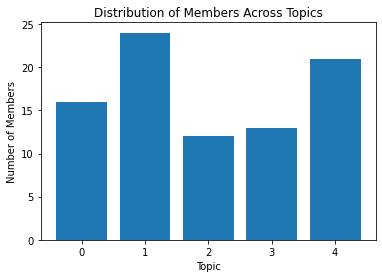

In [33]:
topic_counts = {topic: list(user_topics.values()).count(topic) for topic in range(num_topics)}
plt.bar(topic_counts.keys(), topic_counts.values())
plt.xlabel('Topic')
plt.ylabel('Number of Members')
plt.title('Distribution of Members Across Topics')
plt.xticks(list(range(num_topics)))
plt.show()

In [34]:
wordclouds = {}
for topic_id in range(num_topics):
    topic_keywords = [word for word, prob in lda_model.show_topic(topic_id, topn=20)]
    wordcloud_text = ' '.join(topic_keywords)
    wordclouds[topic_id] = wordcloud_text


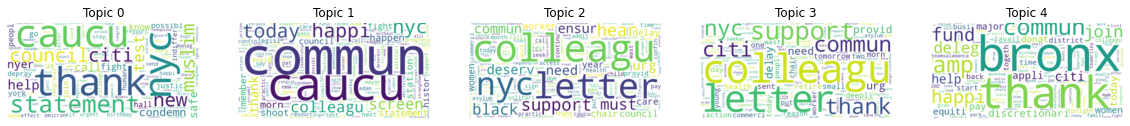

In [37]:

# Plot the word clouds
fig, axs = plt.subplots(1, num_topics, figsize=(20, 5))
for topic_id in range(num_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordclouds[topic_id])
    axs[topic_id].imshow(wordcloud, interpolation='bilinear')
    axs[topic_id].set_title(f'Topic {topic_id}')
    axs[topic_id].axis('off')
plt.show()

In [38]:
user_topics

{'A_StevensD16': 4,
 'AdrienneToYou': 4,
 'AmandaFariasNYC': 2,
 'AriKagan47': 1,
 'BobHoldenNYC': 1,
 'CMAmandaFarias': 2,
 'CMAriKagan47': 1,
 'CMBobHoldenNYC': 1,
 'CMBrooksPowers': 1,
 'CMCarlinaRivera': 1,
 'CMChiOsse': 2,
 'CMCrystalHudson': 0,
 'CMDMCarr': 3,
 'CMFarahLouis': 1,
 'CMFranciscoMoya': 3,
 'CMJenGutierrez': 1,
 'CMJulieWon': 4,
 'CMKevinCRiley': 4,
 'CMLindaLee': 1,
 'CMMercedesCD46': 1,
 'CMNantashaW': 3,
 'CMPiSanchez': 4,
 'CMRestler': 1,
 'CMRitaJoseph': 2,
 'CMSalamancaJr': 4,
 'CMSandraUng': 0,
 'CMSandyNurse': 0,
 'CMShahanaHanif': 1,
 'CMShaunAbreu': 0,
 'CMShekarK': 3,
 'CMbarron2': 4,
 'CMvpaladino': 1,
 'CabanD22': 0,
 'CarlinaRivera': 2,
 'CarmenForNYC': 4,
 'ChrisMarteNYC': 1,
 'CnDelarosa': 4,
 'CouncilwomanKrj': 4,
 'DMCarr': 3,
 'DarleneMealy55': 4,
 'DianaAyalaNYC': 3,
 'EricDinowitz': 0,
 'EricDinowitzNYC': 4,
 'FarahNLouis': 1,
 'FranciscoMoyaNY': 2,
 'GaleBrewerNYC': 1,
 'InnaVernikov': 3,
 'JenGutierrezNYC': 1,
 'JimGennaro': 2,
 'JoannAriola32'

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [20]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


In [18]:
cop_words = ['cop', 'police', 'nypd','officer']
transit_words = ['bus','bus rider','train','subway','mta','transit']
bike_words = ['bike','bike lane','protected bike lane','cycle','cyclist']
housing_words = ['rent','housing']
educ_words = ['education','teachers','schools','students']
unions = ['dc37','1199seiou']

In [19]:
cop_tweets = cc_only[cc_only['text'].str.contains('|'.join(cop_words), case=False)]

In [23]:
cop_tweets['vader_sentiment'] = cop_tweets['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\samtg\AppData\Local\Temp\ipykernel_3260\2772114573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop_tweets['vader_sentiment'] = cop_tweets['text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [24]:
cop_username = cop_tweets.groupby('username')['vader_sentiment'].mean()

In [26]:
cop_tweets

,date,username,name,verified,text,retweets,likes,replies,quotes,tweet_url,media,user_bio,in_reply_id,in_reply_username,retweeted_username,vader_sentiment
2017,2023-03-13 21:59:36+00:00,tiffany_caban,Tiffany Cabán,True,.@tiffany_caban asks @NYCHRA how much spent on...,4,12,5,0,https://twitter.com/tiffany_caban/status/16354...,No Image URL,Queer. Abolitionist. NYC Council Member reppin...,NaN,NaN,PeoplesPlanNYC,-0.3412
2024,2023-03-13 21:55:08+00:00,CMChiOsse,Council Member Chi Ossé,True,"We toured @MoMath1, held preliminary budget he...",0,0,1,0,https://twitter.com/CMChiOsse/status/163539911...,https://pbs.twimg.com/media/FrIa0uGXoAAfA9w.jpg,Official Government account for @OsseChi. Repr...,1.478062e+18,CMChiOsse,NaN,-0.0516
4013,2023-03-11 23:02:52+00:00,VickieforNYC,Councilwoman Vickie Paladino,False,My office is collecting training toys for the ...,6,22,3,2,https://twitter.com/VickieforNYC/status/163469...,https://pbs.twimg.com/media/Fq-Njt9WYAMOtdQ.jpg,NYC Council Member representing District 19 of...,NaN,NaN,CMvpaladino,0.3182
4043,2023-03-11 22:20:57+00:00,CMvpaladino,Councilwoman Vickie Paladino,False,My office is collecting training toys for the ...,6,22,3,2,https://twitter.com/CMvpaladino/status/1634680...,https://pbs.twimg.com/media/Fq-Njt9WYAMOtdQ.jpg,Representing @nyccouncil District 19 in Queens...,NaN,NaN,NaN,0.3182
4513,2023-03-11 13:30:02+00:00,CMSandraUng,Sandra Ung 黄敏仪,False,Read about the @NYPDNews public safety seminar...,2,3,0,0,https://twitter.com/CMSandraUng/status/1634547...,https://pbs.twimg.com/media/Fq8UCm4XoAAt0VB.jpg,"NYC Councilmember Sandra Ung, District 20. Cha...",NaN,NaN,NaN,0.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873921,2022-01-04 22:07:08+00:00,CMShahanaHanif,Council Member Shahana Hanif,True,"For too long, Black and brown NYers have been ...",14,94,32,6,https://twitter.com/CMShahanaHanif/status/1478...,No Image URL,Government account for @ShahanaFromBK. Represe...,NaN,NaN,ShahanaFromBK,-0.7096
874769,2022-01-04 13:36:45+00:00,JoeBorelliNYC,Joe Borelli,True,🚨 NOW\n⏰ 8:25am EST\n\n@JoeBorelliNYC joins @J...,2,7,0,0,https://twitter.com/JoeBorelliNYC/status/14783...,https://pbs.twimg.com/media/FIQeiSWXwAQxvBv.jpg,"Dad, Husband, NYC Council Republican Leader, S...",NaN,NaN,JoePiscopoShow,-0.3400
878040,2022-01-02 22:55:28+00:00,InnaVernikov,Councilwoman Inna Vernikov,True,Thank you to all who joined us today to rally ...,60,359,30,11,https://twitter.com/InnaVernikov/status/147777...,https://pbs.twimg.com/media/FIIdDg6XoAIlANO.jpg,"New York City Council Minority Whip, 48th Dist...",NaN,NaN,NaN,0.8436
878334,2022-01-02 20:22:30+00:00,AriKagan47,Ari Kagan,False,I attended a rally in Bensonhurst against anti...,5,22,0,0,https://twitter.com/AriKagan47/status/14777370...,https://pbs.twimg.com/media/FIH3SSaWYAAwI3q.jpg,Father. Husband. Immigrant. Southern Brooklyn ...,NaN,NaN,NaN,-0.6661


In [61]:
transit_tweets = cc_only[cc_only['text'].str.contains('|'.join(transit_words), case=False)]
transit_tweets['sentiment_score'] = transit_tweets['text'].apply(get_sentiment_score)
transit_username = transit_tweets.groupby('username')['sentiment_score'].mean()

C:\Users\samtg\AppData\Local\Temp/ipykernel_26076/1323418412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_tweets['sentiment_score'] = transit_tweets['text'].apply(get_sentiment_score)


In [63]:
bike_tweets = cc_only[cc_only['text'].str.contains('|'.join(bike_words), case=False)]
bike_tweets['sentiment_score'] = bike_tweets['text'].apply(get_sentiment_score)
bike_username = bike_tweets.groupby('username')['sentiment_score'].mean()

C:\Users\samtg\AppData\Local\Temp/ipykernel_26076/1811904158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_tweets['sentiment_score'] = bike_tweets['text'].apply(get_sentiment_score)


In [64]:
bike_username

username
A_StevensD16       0.258561
AdrienneToYou      0.500000
AmandaFariasNYC    0.211245
AriKagan47         0.223264
BobHoldenNYC       0.059466
                     ...   
juliej_won         0.085951
mvelaznyc          0.040086
nycpa              0.315783
tiffany_caban     -0.038889
voteshekar         0.173740
Name: sentiment_score, Length: 72, dtype: float64